In [192]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import matplotlib as mpl
mpl.use("pgf")
mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
%matplotlib inline

# The Lorenz attractor

### a)

In [155]:
def rk4_step(y0, x0, f, h, r):
    ''' Simple python implementation for one RK4 step. 
        Inputs:
            y_0    - M x 1 numpy array specifying all variables of the ODE at the current time step
            x_0    - current time step
            f      - function that calculates the derivates of all variables of the ODE
            h      - time step size
            f_args - Dictionary of additional arguments to be passed to the function f
        Output:
            yp1 - M x 1 numpy array of variables at time step x0 + h
            xp1 - time step x0+h
    '''
    k1 = h * f(y0, x0, r)
    k2 = h * f(y0 + k1/2., x0 + h/2.,r)
    k3 = h * f(y0 + k2/2., x0 + h/2., r)
    k4 = h * f(y0 + k3, x0 + h, r)
    
    xp1 = x0 + h
    yp1 = y0 + 1./6.*(k1 + 2.*k2 + 2.*k3 + k4)
    
    return(yp1,xp1)

def rk4(y0, x0, f, h, n, r):
    ''' Simple implementation of RK4
        Inputs:
            y_0    - M x 1 numpy array specifying all variables of the ODE at the current time step
            x_0    - current time step
            f      - function that calculates the derivates of all variables of the ODE
            h      - time step size
            n      - number of steps
            f_args - Dictionary of additional arguments to be passed to the function f
        Output:
            yn - N+1 x M numpy array with the results of the integration for every time step (includes y0)
            xn - N+1 x 1 numpy array with the time step value (includes start x0)
    '''
    if type(y0) == float:
        N = 1
    else:
        N = y0.shape[0]
    yn = np.zeros((n+1, N))
    xn = np.zeros(n+1)
    yn[0,:] = y0
    xn[0] = x0
    
    for n in np.arange(1,n+1,1):
        yn[n,:], xn[n] = rk4_step(y0 = yn[n-1,:], x0 = xn[n-1], f = f, h = h, r = r)
        
    return(yn, xn)

In [156]:
#defining f(x) for the RK-4
rho = 10
b = 8/3

def f_latt(x,t,r):
    f = np.zeros(3)
    f[0] = -rho*(x[0] - x[1])
    f[1] = r*x[0] - x[1] - x[0]*x[2]
    f[2] = x[0]*x[1] - b*x[2]
    return f

In [163]:
def latt_solver(x0,t0,f,dt,n,r , sigma):
    x0 = x0 + sigma
    y_n, t_n = rk4(x0,t0,f,dt,n,r)
    ax = plt.figure().add_subplot(projection = '3d')
    ax.plot(y_n[0,0],y_n[0,1],y_n[0,2], label = "Initial conditions ({:.3}, {:.3}, {:.3})".format(x0[0] , x0[1], x0[2]),
            linestyle = "None",marker = 'o', markersize = 5)
    ax.plot(y_n[:,0],y_n[:,1],y_n[:,2]
           , color = "green")
    plt.title("Solution for Lorenz attractor, r = {}".format(r) )
    plt.legend(loc = 'best')
    ax.set_xlabel(r'X(t)')
    ax.set_ylabel(r'Y(t)')
    ax.set_zlabel(r'Z(t)')

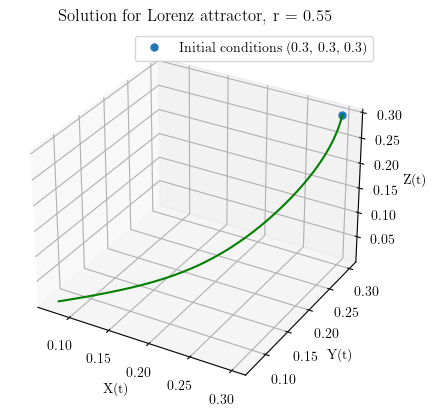

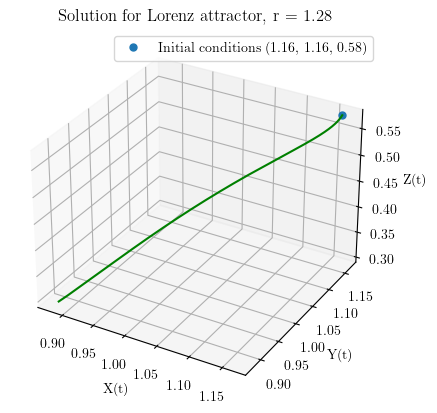

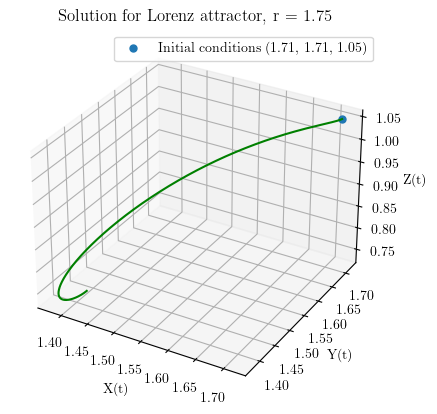

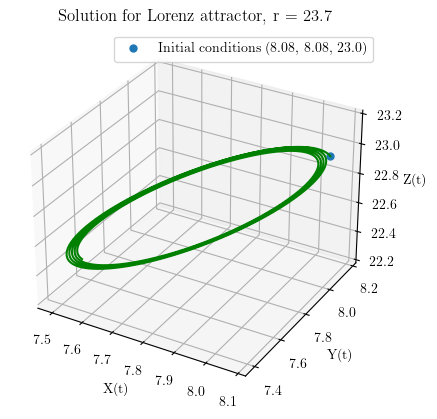

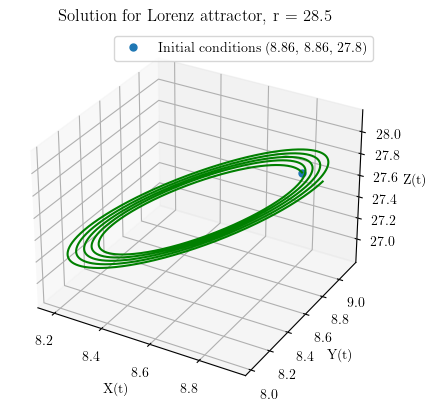

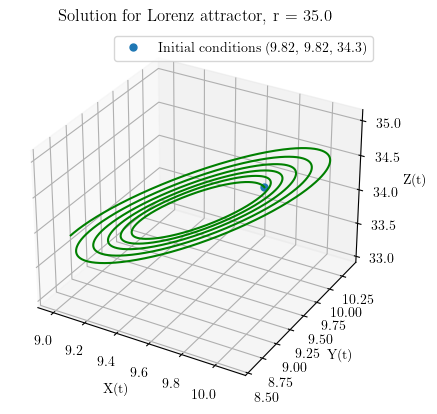

In [164]:
sigma = 0.3
for i in range(0,len(r)):
    if r[i] <1:
        x_0 = np.zeros(3)
        latt_solver(x_0,0,f_latt,0.001,3000,r[i],sigma)
    else:
        a_0 = np.sqrt(b*(r[i] - 1))
        x0_1 = np.array([a_0,a_0,r[i]-1])
        #x0_2 = np.array([-a_0,-a_0,r[i]-1])
        latt_solver(x0_1,0,f_latt,0.001,3000,r[i],sigma)
        #latt_solver(x0_2,0,f_latt,0.001,3000,r[i], sigma)

### b)

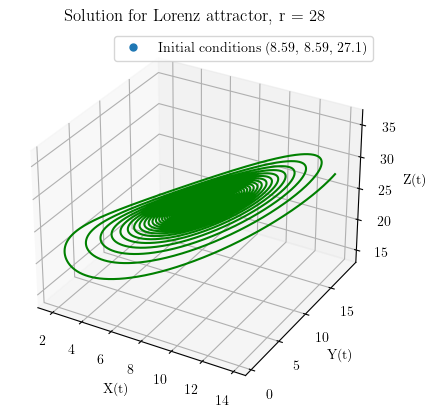

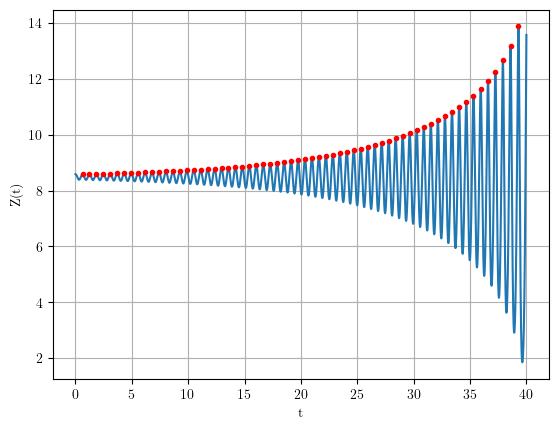

In [278]:
r = 28
dt = 0.001
n = 40000
sigma = 0.1
a_0 = np.sqrt(b*(r - 1))
x0_1 = np.array([a_0,a_0,r-1])
yn,tn = rk4(x0_1+sigma,0,f_latt,dt,n,r)
latt_solver(x0_1,0,f_latt,dt,n,r,sigma)

zn = yn[:,0]
i = 0
n = 100
z_idx = argrelextrema(zn,np.greater)
zk = np.array([])
tk = np.array([])
fig2, ax2 = plt.subplots()
for i in range(0,len(z_idx[0])):
    zk = np.append(zk,zn[z_idx[0][i]])
    tk = np.append(tk,tn[z_idx[0][i]])
ax2.plot(tn,zn)
ax2.plot(tk,zk, linestyle = "None",marker = 'o', color = 'red', markersize = 3)
plt.xlabel('t')
plt.ylabel('Z(t)')
plt.grid()

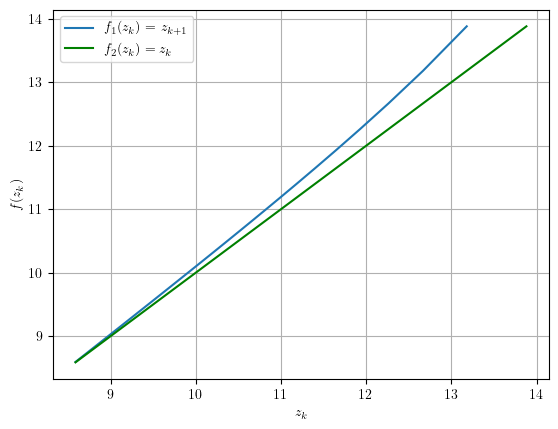

In [280]:
 
plt.plot(zk[:-1],zk[1:], label = r'$f_1(z_k)$ = $z_{k+1}$')
plt.plot(zk,zk, label = r'$f_2(z_k) = z_k$', color = 'green')
plt.legend()
plt.xlabel(r'$z_k$')
plt.ylabel(r'$f(z_k)$')
plt.grid()

Comparing the slope of $f_1$ and $f_2$ we can confirm that |m| > 0, ergo this solution is not periodic